Note: you may need to restart the kernel to use updated packages.


C:\Users\ysmak\AppData\Local\Temp\ipykernel_15220\1637412002.py:6: DeprecationWarning:

load_dataset is deprecated and will be removed in a future version.



First 5 records:

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 

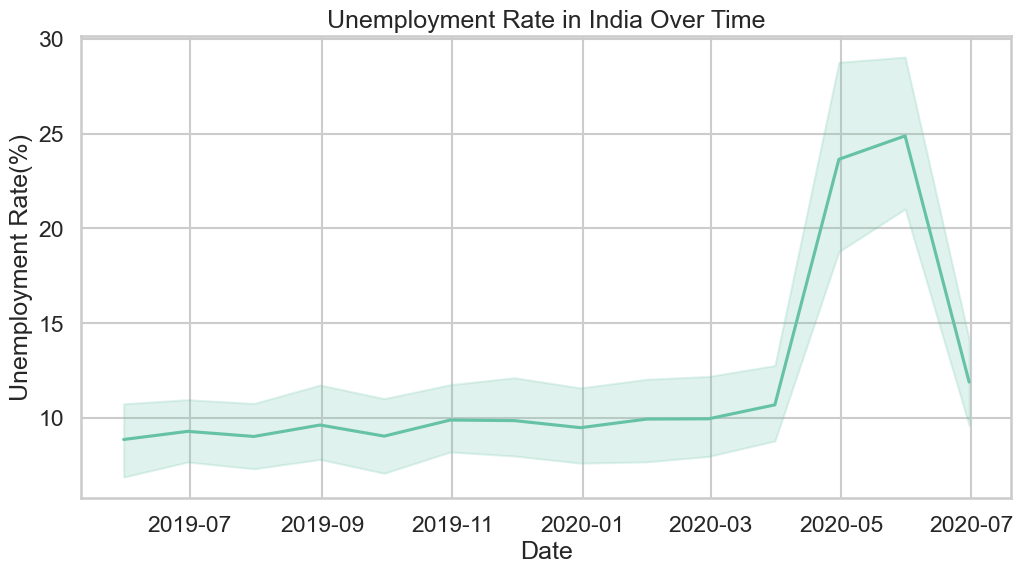

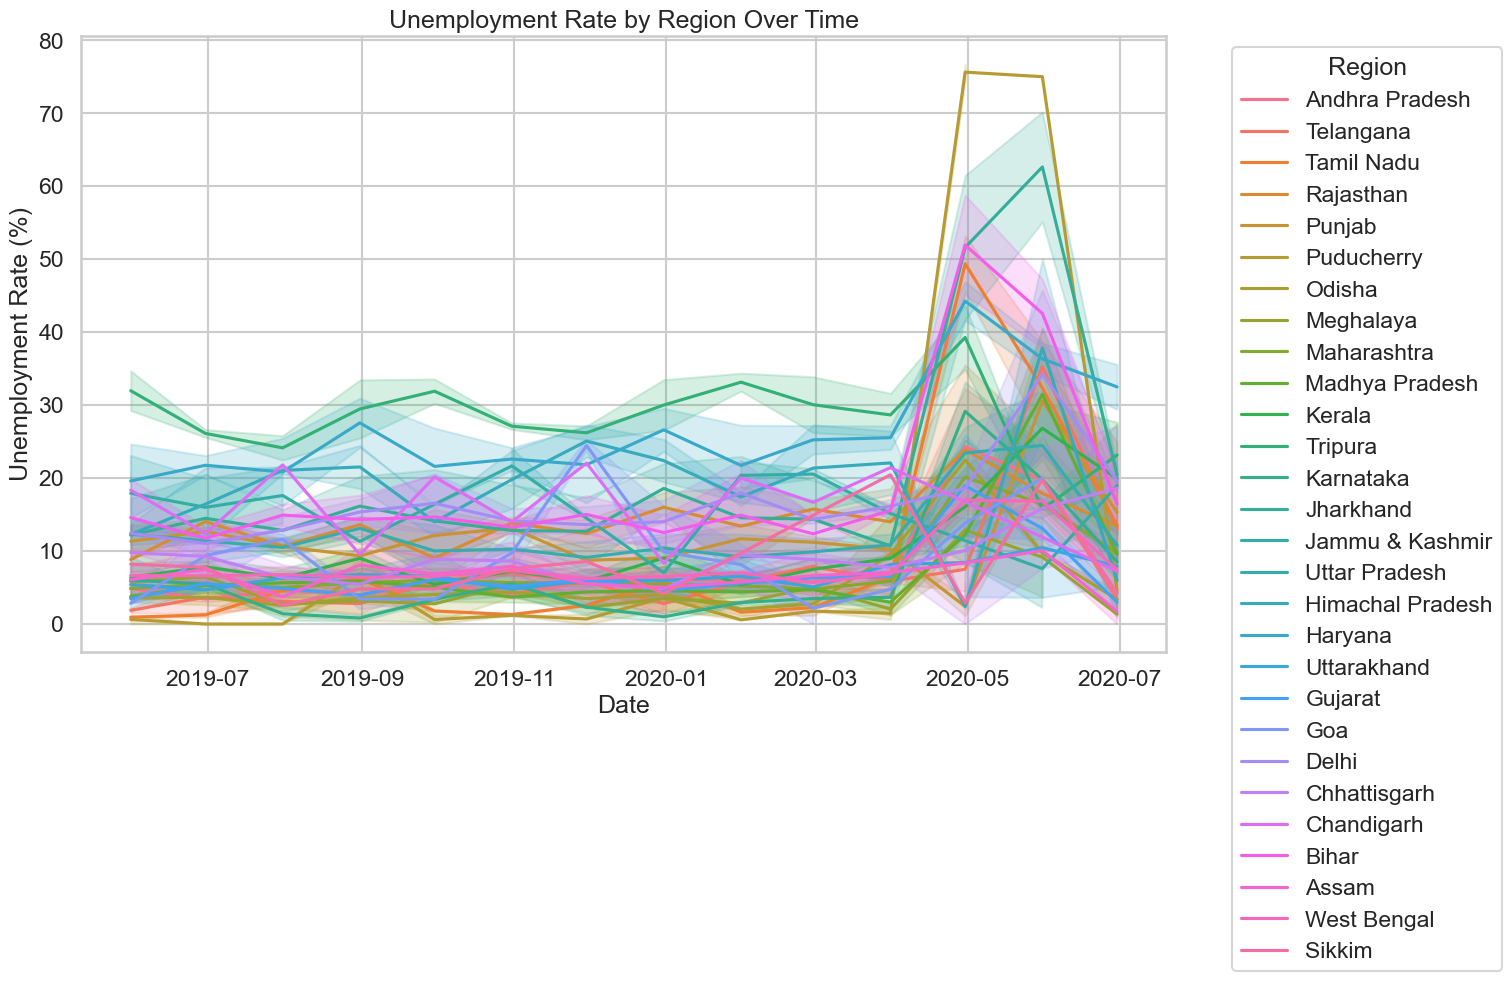

C:\Users\ysmak\AppData\Local\Temp\ipykernel_15220\1637412002.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




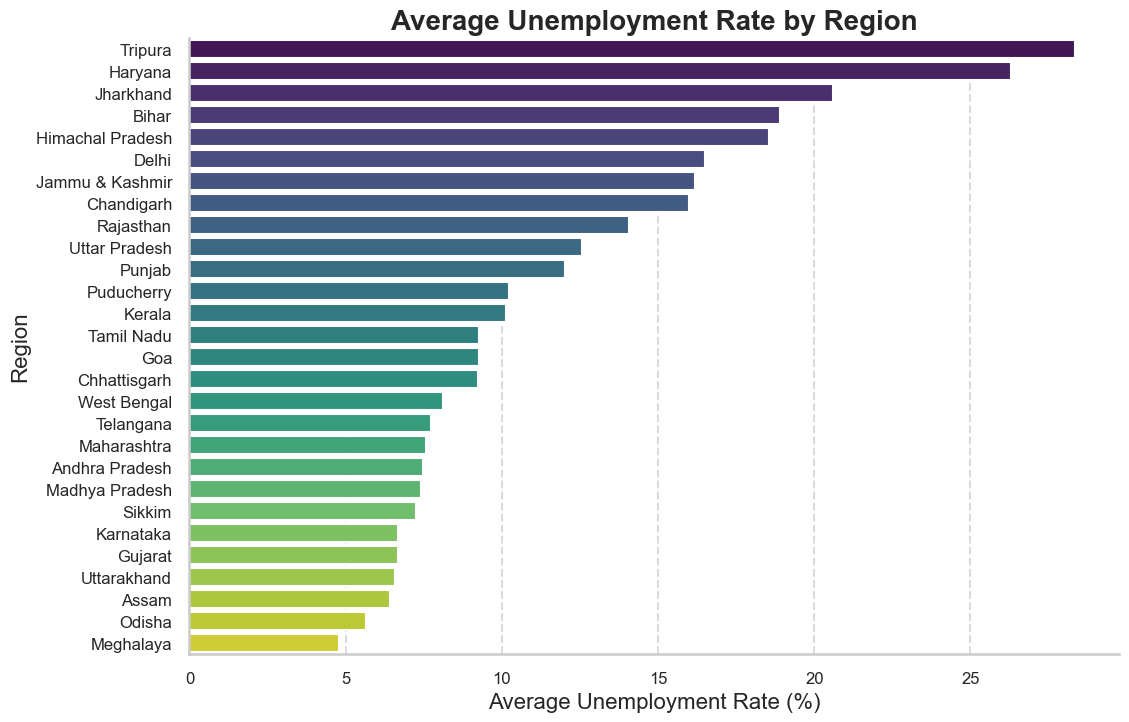

In [4]:
%pip install kagglehub[pandas-datasets]
import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter
file_path='Unemployment in India.csv'
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "gokulrajkmv/unemployment-in-india",
    file_path,
)
print("First 5 records:\n")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())
df.columns = df.columns.str.strip()
import matplotlib.pyplot as plt
import seaborn as sns
# print(df.columns)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
# df.columns = df.columns.str.strip()
# print(df.columns)

plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Estimated Unemployment Rate (%)',data=df)
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate(%)')
plt.show()

plt.figure(figsize=(14,8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Unemployment Rate by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
# print(region_avg)
# df['Region'] = df['Region'].str.strip().str.title()
# plt.figure(figsize=(10,8))
# sns.barplot(x=region_avg.index, y=region_avg.values)
# plt.title('Average Unemploument Rate by Region')
# plt.xlabel('Region')
# plt.ylabel('Average Unemployment Rate (%)')
# plt.xticks(rotation=90)
# plt.show()

sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("talk")

plt.figure(figsize=(12,8))
ax = sns.barplot(y=region_avg.index, x=region_avg.values, palette="viridis")
plt.title('Average Unemployment Rate by Region', fontsize=20, fontweight='bold')
plt.xlabel('Average Unemployment Rate (%)', fontsize=16)
plt.ylabel('Region', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()

# # Add data labels
# for i, v in enumerate(region_avg.values):
#     ax.text(v + 0.1, i, f"{v:.2f}", color='black', va='center', fontsize=12)

# plt.tight_layout()
# plt.show()

# import plotly.express as px
# fig = px.bar(region_avg, x=region_avg.values, y=region_avg.index, orientation='h', title='Average Unemployment Rate by Region')
# fig.show()
